# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

In [777]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import json
import datetime as dt
%matplotlib inline



In [778]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)


In [779]:
profile = pd.read_json('data/profile.json', orient='records', lines=True)


In [780]:
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

# Data Exploration


In [781]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [782]:
profile

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [783]:
transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


#### Before starting this project, we will create a key function to accurately assess the amount of missing data in the dataset.

In [784]:

def check_missing_values(df):
    """
    This function evaluates the number of missing (null) values in each column of a dataset 
    and returns a summary of both the count and percentage of missing values.
    
    INPUT:
        df : pandas DataFrame
        The dataset to be evaluated for missing values.
    
    PROCESS:
        The function will check each column of the DataFrame for missing (null) values.
        It calculates the total number of missing values for each column.
        It computes the percentage of missing values relative to the total number of rows.
    
    OUTPUT:
        pandas DataFrame
            A dataframe summarizing:
                - 'Missing Values': The total count of missing values per column.
                - 'Percentage': The percentage of missing values per column.
    """

    
    missing_count = df.isnull().sum()
    
    missing_percentage = (missing_count / len(df)) * 100
    
    missing_summary = pd.DataFrame({
        'Missing Values': missing_count,
        'Percentage (%)': missing_percentage
    })
    
    missing_summary = missing_summary[missing_summary['Missing Values'] > 0]
    
    missing_summary = missing_summary.sort_values(by='Percentage (%)', ascending=False)
    
    return missing_summary



### Portfolio data(offer information)

**Let's have a look at the verious offers in the portfolio. And will do Exploratory Data Analysis**

Upon reviewing the portfolio data, I would like to present below analysis.

    1.Which offer types are most common, and how do their rewards compare?
    2.What is the relationship between offer difficulty and reward?
    3.Which channels (email, mobile, web, social) are most frequently used for offers?
    4.How does the duration of offers vary by type and reward?
    5.Are there specific combinations of channels that tend to be associated with higher rewards or more difficult offers?

In [785]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [786]:
portfolio.rename(columns={'id':'offer_id'},inplace=True)

In [787]:
# 1.Which offer types are most common, and how do their rewards compare?

most_common_offer = portfolio['offer_type'].value_counts()
print("There are total {} number offers".format(len(most_common_offer)))
print("\nThose are:\n",most_common_offer)

There are total 3 number offers

Those are:
 offer_type
bogo             4
discount         4
informational    2
Name: count, dtype: int64


/tmp/ipykernel_13/3516049878.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_common_offer.index, y=most_common_offer.values, palette="viridis")


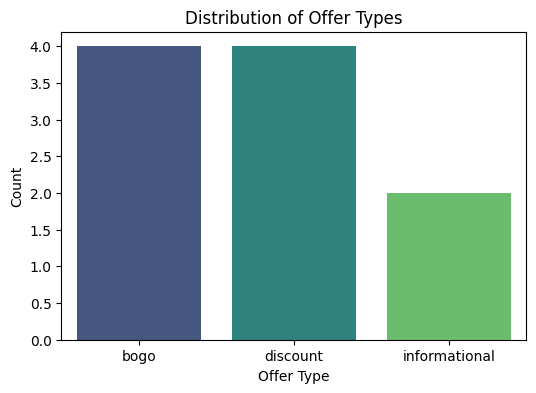

In [788]:
plt.figure(figsize=(6, 4))
sns.barplot(x=most_common_offer.index, y=most_common_offer.values, palette="viridis")
plt.title('Distribution of Offer Types')
plt.xlabel('Offer Type')
plt.ylabel('Count')
plt.show()

In [789]:
avg_reward_by_offer_type = portfolio.groupby('offer_type')['reward'].mean()
avg_reward_by_offer_type

offer_type
bogo             7.5
discount         3.0
informational    0.0
Name: reward, dtype: float64

/tmp/ipykernel_13/1262779299.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_reward_by_offer_type.index, y=avg_reward_by_offer_type.values, palette="coolwarm")


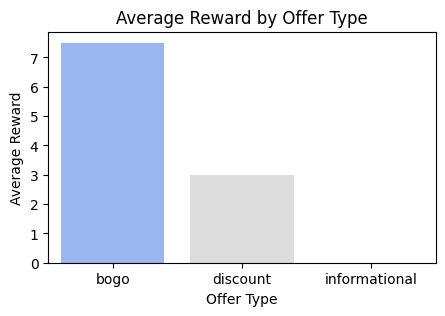

In [790]:
plt.figure(figsize=(5, 3))
sns.barplot(x=avg_reward_by_offer_type.index, y=avg_reward_by_offer_type.values, palette="coolwarm")
plt.title('Average Reward by Offer Type')
plt.xlabel('Offer Type')
plt.ylabel('Average Reward')
plt.show()


Correlation between Difficulty and Reward: 0.47


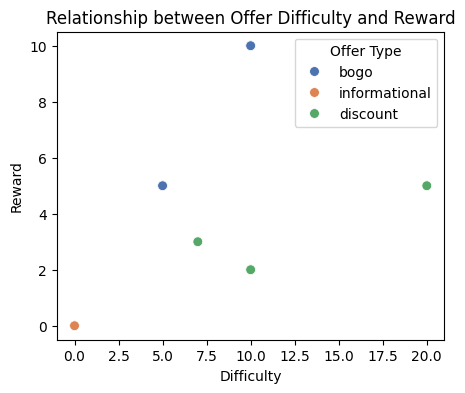

In [791]:
# 2.What is the relationship between offer difficulty and reward?

# Calculate the correlation between difficulty and reward
correlation = portfolio[['difficulty', 'reward']].corr().iloc[0, 1]
print(f"Correlation between Difficulty and Reward: {correlation:.2f}")

plt.figure(figsize=(5, 4))
sns.scatterplot(x='difficulty', y='reward', data=portfolio, hue='offer_type', palette='deep', s=50)
plt.title('Relationship between Offer Difficulty and Reward')
plt.xlabel('Difficulty')
plt.ylabel('Reward')
plt.legend(title='Offer Type')
plt.show()

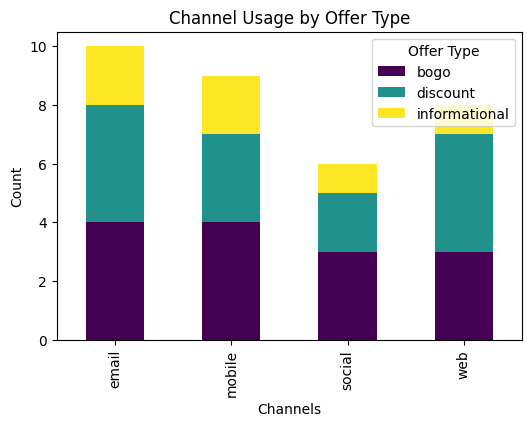

Channel Distribution:
channels
email     10
mobile     9
web        8
social     6
Name: count, dtype: int64


In [792]:
# 3.Which channels (email, mobile, web, social) are most frequently used for offers?

exploded_df = portfolio.explode('channels')

# Group by channels and offer type to see channel distribution for each offer type
channel_offer_type = exploded_df.groupby(['channels', 'offer_type']).size().unstack()

# Plot the usage of channels across offer types
channel_offer_type.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='viridis')
plt.title('Channel Usage by Offer Type')
plt.xlabel('Channels')
plt.ylabel('Count')
plt.legend(title='Offer Type')
plt.show()

# Display channel counts
channel_counts = exploded_df['channels'].value_counts()
print("Channel Distribution:")
print(channel_counts)


Average Duration by Offer Type:
offer_type
bogo             6.0
discount         8.5
informational    3.5
Name: duration, dtype: float64


/tmp/ipykernel_13/164448662.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='offer_type', y='duration', data=portfolio, palette='Set2')


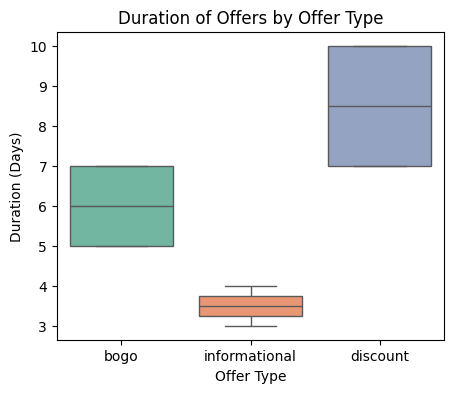

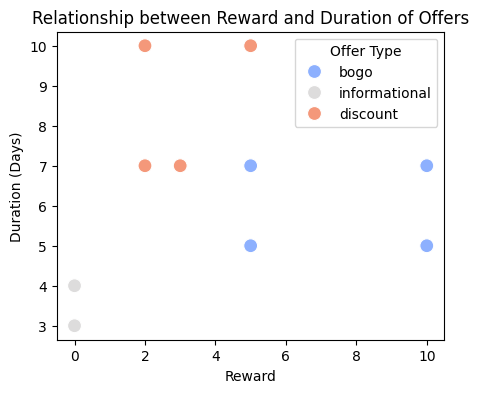

In [793]:
# 4.How does the duration of offers vary by type and reward?

# Calculate the average duration for each offer type
avg_duration_by_offer_type = portfolio.groupby('offer_type')['duration'].mean()
print("\nAverage Duration by Offer Type:")
print(avg_duration_by_offer_type)

# Plot the relationship between offer type and duration
plt.figure(figsize=(5, 4))
sns.boxplot(x='offer_type', y='duration', data=portfolio, palette='Set2')
plt.title('Duration of Offers by Offer Type')
plt.xlabel('Offer Type')
plt.ylabel('Duration (Days)')
plt.show()

# Plot the relationship between reward and duration
plt.figure(figsize=(5, 4))
sns.scatterplot(x='reward', y='duration', hue='offer_type', data=portfolio, palette='coolwarm', s=100)
plt.title('Relationship between Reward and Duration of Offers')
plt.xlabel('Reward')
plt.ylabel('Duration (Days)')
plt.legend(title='Offer Type')
plt.show()

/tmp/ipykernel_13/3478338404.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='reward', y='channel_combination', data=channel_comb_stats, palette='Blues_d')


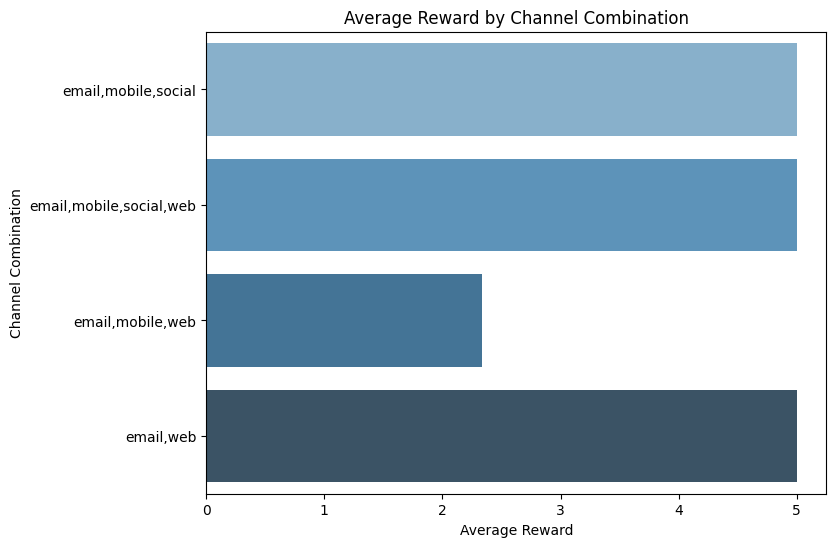

/tmp/ipykernel_13/3478338404.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='difficulty', y='channel_combination', data=channel_comb_stats, palette='Reds_d')


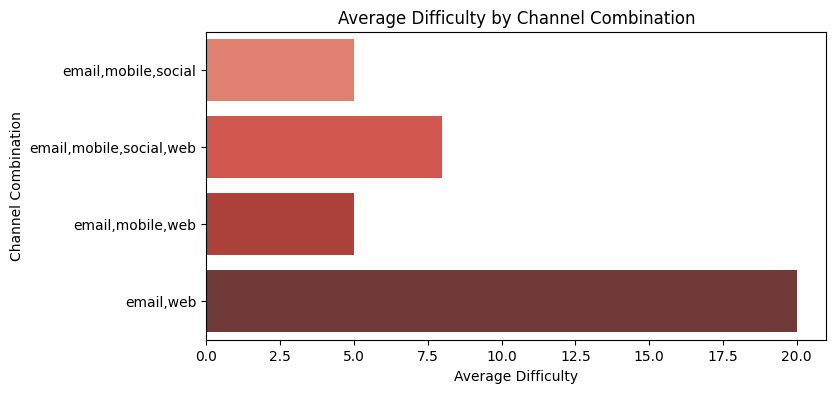

Average Reward and Difficulty by Channel Combination:
       channel_combination    reward  difficulty
0      email,mobile,social  5.000000         5.0
1  email,mobile,social,web  5.000000         8.0
2         email,mobile,web  2.333333         5.0
3                email,web  5.000000        20.0


In [794]:
# 5.Are there specific combinations of channels that tend to be associated with higher rewards or more difficult offers?

# Create a column for the channel combination as a string
portfolio['channel_combination'] = portfolio['channels'].apply(lambda x: ','.join(sorted(x)))

# Analyze average reward and difficulty by channel combination
channel_comb_stats = portfolio.groupby('channel_combination').agg({'reward': 'mean', 'difficulty': 'mean'}).reset_index()

# Plot channel combination vs average reward
plt.figure(figsize=(8, 6))
sns.barplot(x='reward', y='channel_combination', data=channel_comb_stats, palette='Blues_d')
plt.title('Average Reward by Channel Combination')
plt.xlabel('Average Reward')
plt.ylabel('Channel Combination')
plt.show()

# Plot channel combination vs average difficulty
plt.figure(figsize=(8, 4))
sns.barplot(x='difficulty', y='channel_combination', data=channel_comb_stats, palette='Reds_d')
plt.title('Average Difficulty by Channel Combination')
plt.xlabel('Average Difficulty')
plt.ylabel('Channel Combination')
plt.show()

# Display the aggregated data
print("Average Reward and Difficulty by Channel Combination:")
print(channel_comb_stats)


In [795]:
# get dummies to make indiviual column from list of channels
channels = pd.get_dummies(portfolio.channels.apply(pd.Series).stack()).sum()
portfolio = pd.concat([portfolio, channels], axis=1)

channels

email     10
mobile     9
social     6
web        8
dtype: int64

Explode the 'channels' column to turn the list of channels into multiple rows

Create one-hot encoding for the 'channels' column using pd.crosstab

Concatenate the one-hot encoded columns back to the original DataFrame


In [796]:
exploded_channels = portfolio.explode('channels')

channels = pd.crosstab(exploded_channels.index, exploded_channels['channels'])

portfolio = pd.concat([portfolio, channels], axis=1)

portfolio.drop(['channels'], axis=1, inplace=True)

portfolio.head(5)

,reward,difficulty,duration,offer_type,offer_id,channel_combination,0,email,mobile,social,web
0,10.0,10.0,7.0,bogo,ae264e3637204a6fb9bb56bc8210ddfd,"email,mobile,social",NaN,1.0,1.0,1.0,0.0
1,10.0,10.0,5.0,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,"email,mobile,social,web",NaN,1.0,1.0,1.0,1.0
2,0.0,0.0,4.0,informational,3f207df678b143eea3cee63160fa8bed,"email,mobile,web",NaN,1.0,1.0,0.0,1.0
3,5.0,5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,"email,mobile,web",NaN,1.0,1.0,0.0,1.0
4,5.0,20.0,10.0,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,"email,web",NaN,1.0,0.0,0.0,1.0


There are unnecessary columns found those are 0, and channel_combination.

so we are going to drop it as well.

In [797]:
# we'll drop 0 and channel_combination, as those are not required.
portfolio.drop([0], axis=1, inplace=True)
portfolio.drop(['channel_combination'], axis=1, inplace=True)

portfolio.head(5)

,reward,difficulty,duration,offer_type,offer_id,email,mobile,social,web
0,10.0,10.0,7.0,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1.0,1.0,1.0,0.0
1,10.0,10.0,5.0,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1.0,1.0,1.0,1.0
2,0.0,0.0,4.0,informational,3f207df678b143eea3cee63160fa8bed,1.0,1.0,0.0,1.0
3,5.0,5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,1.0,0.0,1.0
4,5.0,20.0,10.0,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1.0,0.0,0.0,1.0


we will do similar step for offer type too.

and for this solution, we retain the offer_type columns. it will be remain in this dataset.

Explode the 'offer_type' column to turn the list of offer_type into multiple rows

Create one-hot encoding for the 'offer_type' column using pd.crosstab

Concatenate the one-hot encoded columns back to the original DataFrame


In [798]:
exploded_offer_type = portfolio.explode('offer_type')

offer_type = pd.crosstab(exploded_offer_type.index, exploded_offer_type['offer_type'])

portfolio = pd.concat([portfolio, offer_type], axis=1)

In [799]:
# Drop rows with NaN values across specific columns
columns_to_check = ['reward', 'difficulty', 'duration', 'offer_type', 'offer_id', 'email', 'mobile', 'social', 'web']
portfolio.dropna(subset=columns_to_check, inplace=True)


In [800]:
portfolio

,reward,difficulty,duration,offer_type,offer_id,email,mobile,social,web,bogo,discount,informational
0,10.0,10.0,7.0,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1.0,1.0,1.0,0.0,1.0,0.0,0.0
1,10.0,10.0,5.0,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2,0.0,0.0,4.0,informational,3f207df678b143eea3cee63160fa8bed,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,5.0,5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,5.0,20.0,10.0,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5,3.0,7.0,7.0,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1.0,1.0,1.0,1.0,0.0,1.0,0.0
6,2.0,10.0,10.0,discount,fafdcd668e3743c1bb461111dcafc2a4,1.0,1.0,1.0,1.0,0.0,1.0,0.0
7,0.0,0.0,3.0,informational,5a8bc65990b245e5a138643cd4eb9837,1.0,1.0,1.0,0.0,0.0,0.0,1.0
8,5.0,5.0,5.0,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1.0,1.0,1.0,1.0,1.0,0.0,0.0
9,2.0,10.0,7.0,discount,2906b810c7d4411798c6938adc9daaa5,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [801]:
def offer_tag(portfolio):
    # Create a combined 'offer' string with relevant details
    portfolio['active_offer'] = portfolio.apply(
        lambda row: f"{row['offer_type']}_{row['reward']}_for_{row['difficulty']}_in_{row['duration']}days",
        axis=1
    )

    return portfolio

In [802]:
df = portfolio.copy()
portfolio = offer_tag(df)
portfolio

,reward,difficulty,duration,offer_type,offer_id,email,mobile,social,web,bogo,discount,informational,active_offer
0,10.0,10.0,7.0,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1.0,1.0,1.0,0.0,1.0,0.0,0.0,bogo_10.0_for_10.0_in_7.0days
1,10.0,10.0,5.0,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,bogo_10.0_for_10.0_in_5.0days
2,0.0,0.0,4.0,informational,3f207df678b143eea3cee63160fa8bed,1.0,1.0,0.0,1.0,0.0,0.0,1.0,informational_0.0_for_0.0_in_4.0days
3,5.0,5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,1.0,0.0,1.0,1.0,0.0,0.0,bogo_5.0_for_5.0_in_7.0days
4,5.0,20.0,10.0,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,discount_5.0_for_20.0_in_10.0days
5,3.0,7.0,7.0,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1.0,1.0,1.0,1.0,0.0,1.0,0.0,discount_3.0_for_7.0_in_7.0days
6,2.0,10.0,10.0,discount,fafdcd668e3743c1bb461111dcafc2a4,1.0,1.0,1.0,1.0,0.0,1.0,0.0,discount_2.0_for_10.0_in_10.0days
7,0.0,0.0,3.0,informational,5a8bc65990b245e5a138643cd4eb9837,1.0,1.0,1.0,0.0,0.0,0.0,1.0,informational_0.0_for_0.0_in_3.0days
8,5.0,5.0,5.0,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1.0,1.0,1.0,1.0,1.0,0.0,0.0,bogo_5.0_for_5.0_in_5.0days
9,2.0,10.0,7.0,discount,2906b810c7d4411798c6938adc9daaa5,1.0,1.0,0.0,1.0,0.0,1.0,0.0,discount_2.0_for_10.0_in_7.0days


In [803]:
portfolio

,reward,difficulty,duration,offer_type,offer_id,email,mobile,social,web,bogo,discount,informational,active_offer
0,10.0,10.0,7.0,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1.0,1.0,1.0,0.0,1.0,0.0,0.0,bogo_10.0_for_10.0_in_7.0days
1,10.0,10.0,5.0,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,bogo_10.0_for_10.0_in_5.0days
2,0.0,0.0,4.0,informational,3f207df678b143eea3cee63160fa8bed,1.0,1.0,0.0,1.0,0.0,0.0,1.0,informational_0.0_for_0.0_in_4.0days
3,5.0,5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,1.0,0.0,1.0,1.0,0.0,0.0,bogo_5.0_for_5.0_in_7.0days
4,5.0,20.0,10.0,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,discount_5.0_for_20.0_in_10.0days
5,3.0,7.0,7.0,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1.0,1.0,1.0,1.0,0.0,1.0,0.0,discount_3.0_for_7.0_in_7.0days
6,2.0,10.0,10.0,discount,fafdcd668e3743c1bb461111dcafc2a4,1.0,1.0,1.0,1.0,0.0,1.0,0.0,discount_2.0_for_10.0_in_10.0days
7,0.0,0.0,3.0,informational,5a8bc65990b245e5a138643cd4eb9837,1.0,1.0,1.0,0.0,0.0,0.0,1.0,informational_0.0_for_0.0_in_3.0days
8,5.0,5.0,5.0,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1.0,1.0,1.0,1.0,1.0,0.0,0.0,bogo_5.0_for_5.0_in_5.0days
9,2.0,10.0,7.0,discount,2906b810c7d4411798c6938adc9daaa5,1.0,1.0,0.0,1.0,0.0,1.0,0.0,discount_2.0_for_10.0_in_7.0days


In [804]:
# let's describe this data to know statestical info.
portfolio.describe()

,reward,difficulty,duration,email,mobile,social,web,bogo,discount,informational
count,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000,1.0,0.900000,0.600000,0.800000,0.400000,0.400000,0.200000
std,3.583915,5.831905,2.321398,0.0,0.316228,0.516398,0.421637,0.516398,0.516398,0.421637
min,0.000000,0.000000,3.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,5.000000,5.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,4.000000,8.500000,7.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,5.000000,10.000000,7.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,10.000000,20.000000,10.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Profile data - customer information

Next, let's examine the demographic data of the customers.


In [805]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [806]:
profile.head(5)

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


By analyzing the profile data, we may encounter some missing values. 

Let's deal with missing or None('NaN') values and try to fix it.

In [807]:
check_missing_values(profile)

,Missing Values,Percentage (%)
gender,2175,12.794118
income,2175,12.794118


I noticed that both columns have the same percentage of missing values, 12.79%. I would like to examine the data in these columns and compare them to gain insights.

In [808]:
(profile[profile['income'].isna() & profile['gender'].isna()])

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
...,...,...,...,...,...
16980,None,118,5c686d09ca4d475a8f750f2ba07e0440,20160901,NaN
16982,None,118,d9ca82f550ac4ee58b6299cf1e5c824a,20160415,NaN
16989,None,118,ca45ee1883624304bac1e4c8a114f045,20180305,NaN
16991,None,118,a9a20fa8b5504360beb4e7c8712f8306,20160116,NaN


The `gender` and `income` column share (**12.79%**) missing values, Addressing these gaps is essential for accurate demographic analysis and effective marketing strategies.

Moreover, I noticed that, the age is 118 for all the NaN values.

So I decided to drop them.

In [809]:
profile.dropna(inplace=True)

In [810]:
profile.head(3)

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0


 let's modify the datetime formate of `became_member_on`

In [811]:

profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')

profile.head(3)

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0


 let's do feature engineering for became_member_on.
 
 here, we will make one column of duration of member in days count. 


In [812]:
profile['membership_duration'] = profile['became_member_on'].apply(lambda x: (dt.datetime.today().date() - pd.to_datetime(x, format='%Y%m%d').date()).days)

profile.head(4)

,gender,age,id,became_member_on,income,membership_duration
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2632
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2699
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,2347
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,2423


In [813]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14825 entries, 1 to 16999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   gender               14825 non-null  object        
 1   age                  14825 non-null  int64         
 2   id                   14825 non-null  object        
 3   became_member_on     14825 non-null  datetime64[ns]
 4   income               14825 non-null  float64       
 5   membership_duration  14825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 810.7+ KB


In [814]:
profile.rename(columns={'id':'customer_id'},inplace=True)

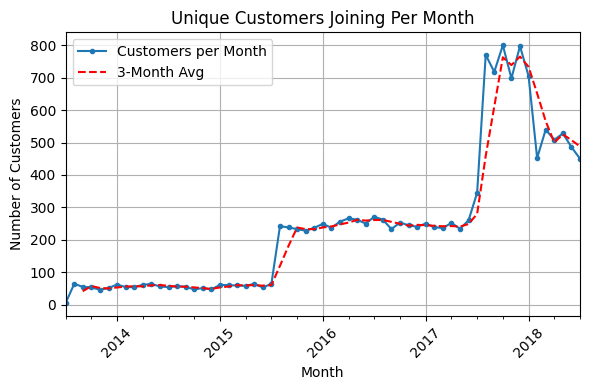

In [815]:
monthly_customers = profile.groupby(profile['became_member_on'].dt.to_period('M'))['customer_id'].nunique()

plt.figure(figsize=(6, 4))
monthly_customers.plot(marker='.', label='Customers per Month')
monthly_customers.rolling(window=3).mean().plot(linestyle='--', color='red', label='3-Month Avg')

plt.title('Unique Customers Joining Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

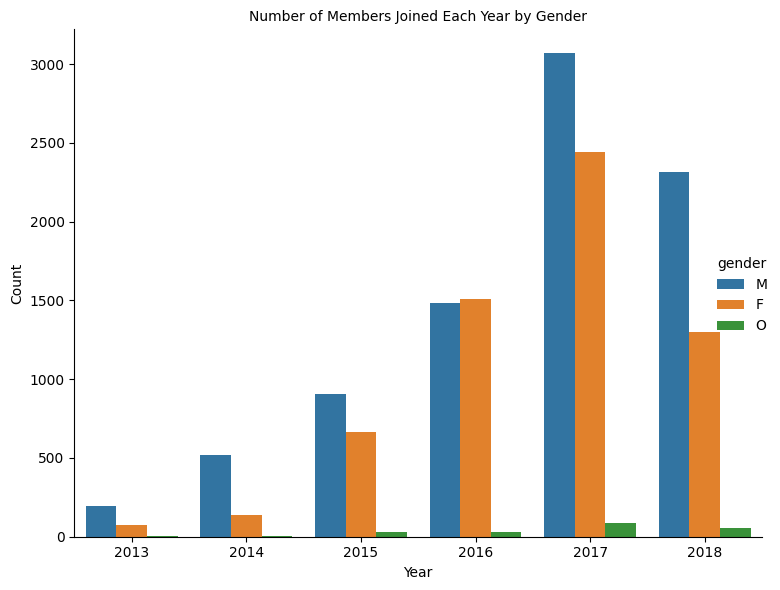

In [816]:

sns.catplot(x=profile['became_member_on'].dt.year, hue='gender', kind='count', data=profile, height=6, aspect=1.2)

plt.title('Number of Members Joined Each Year by Gender', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.tight_layout()
plt.show()

In [817]:
def data_plot(profile, var):
    '''
        INPUT: 
        data(profile), and var to be visualize.
        
        PROCSS:
        return normal histogram and density plot for demographic var(variable)
        
        OUTPUT:
        display data visualization of distrubution of demographic data
        
    '''
    palette = sns.color_palette()
    fig, ax = plt.subplots(figsize=(20,4), nrows = 1, ncols = 3, sharex = True, sharey = True)
    
    plt.sca(ax[0])
    sns.histplot(x=profile[profile['gender'] == 'F'][var], bins=10, kde=True, color=palette[0])
    ax[0].set_title('Gender: F')

    # Plot for gender = 'M'
    
    plt.sca(ax[1])
    sns.histplot(x=profile[profile['gender'] == 'M'][var], bins=10, kde=True, color=palette[1])
    ax[1].set_title('Gender: M')

    # Plot for gender = 'O'
    plt.sca(ax[2])
    sns.histplot(x=profile[profile['gender'] == 'O'][var], bins=10, kde=True, color=palette[2])
    ax[2].set_title('Gender: O')

    # Adjust layout
    
    plt.show()
    
    return plt

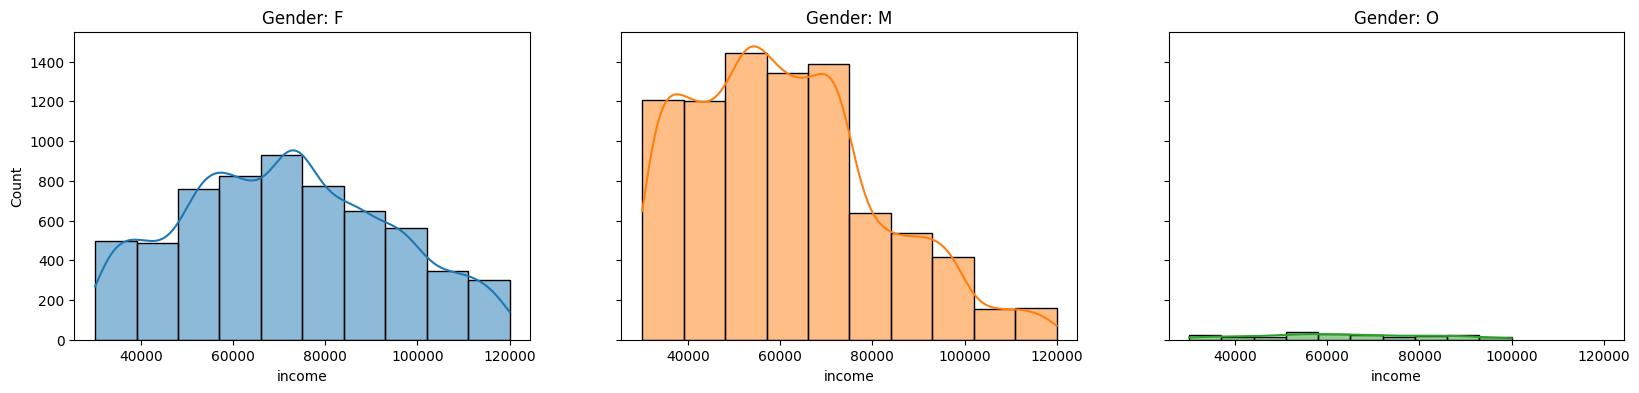

<module 'matplotlib.pyplot' from '/opt/venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [818]:
data_plot(profile, 'income')

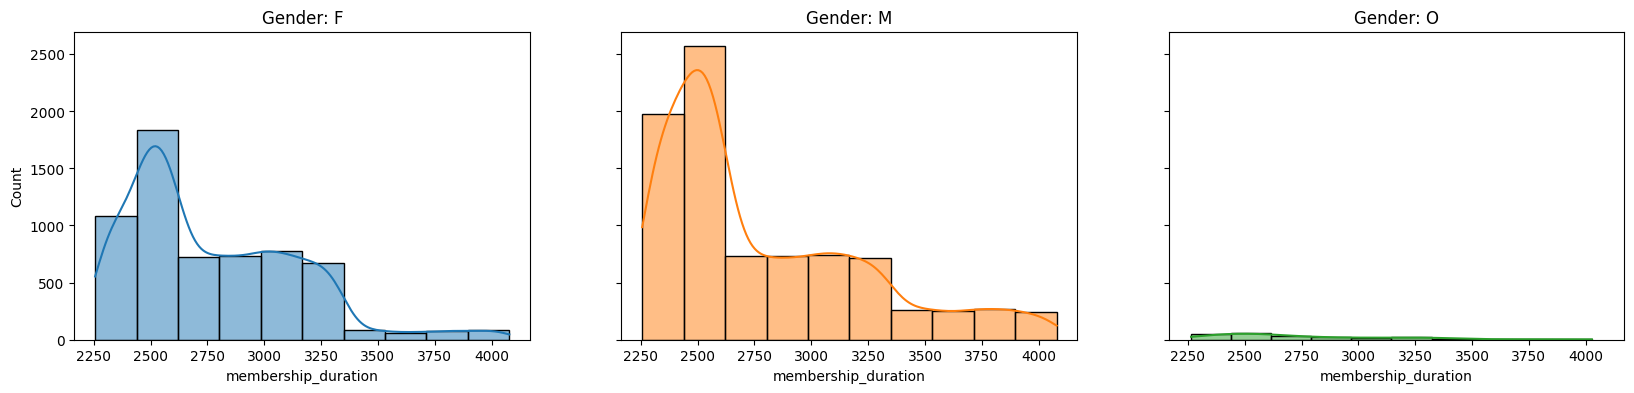

<module 'matplotlib.pyplot' from '/opt/venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [819]:
data_plot(profile, 'membership_duration')

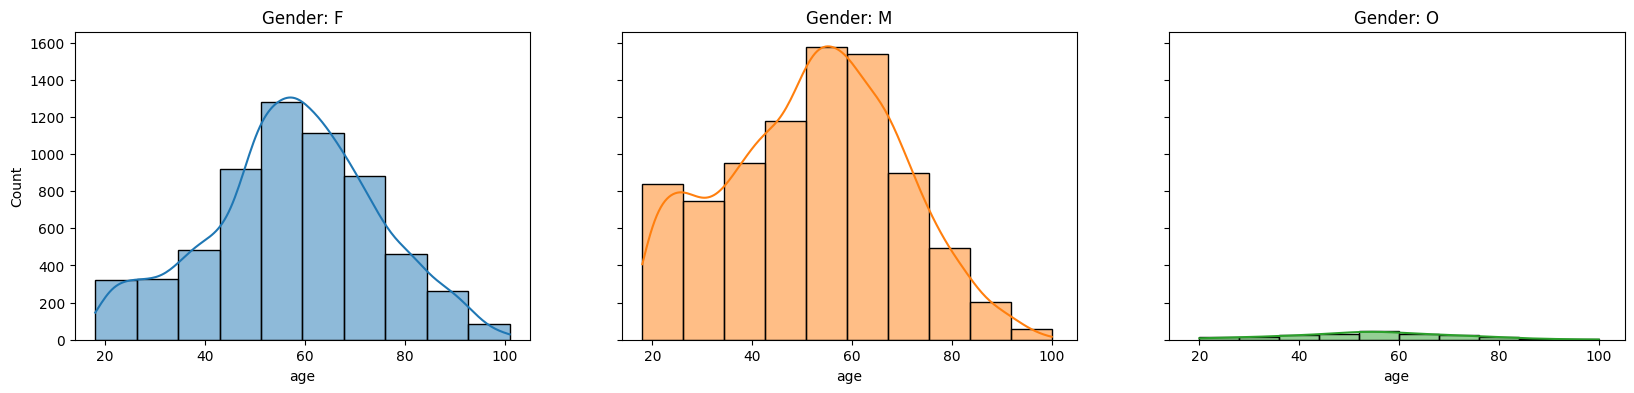

<module 'matplotlib.pyplot' from '/opt/venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [820]:
data_plot(profile, 'age')

# Transcript data

let's examine transcript data and explore it.

In [821]:
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [822]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [823]:
transcript.head(3)

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0


After, carefully reviewing the transcript data. I felt that it has to be `customer_id` instead of `person`. 

let's do that first.

In [824]:
transcript.rename(columns={'person':'customer_id'},inplace=True)
transcript.head(2)

,customer_id,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0


In [825]:
unique_val = transcript['event'].unique()
print('The total {} number of unique in event columns and those are:\n{}'.format(len(unique_val), unique_val))

The total 4 number of unique in event columns and those are:
['offer received' 'offer viewed' 'transaction' 'offer completed']


In [826]:
transcript.value.keys

<bound method Series.keys of 0         {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1         {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2         {'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3         {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4         {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
                                ...                       
306529                      {'amount': 1.5899999999999999}
306530                                    {'amount': 9.53}
306531                                    {'amount': 3.61}
306532                      {'amount': 3.5300000000000002}
306533                                    {'amount': 4.05}
Name: value, Length: 306534, dtype: object>

In [827]:
def clean_value(data):
    '''
        This function processes the transcript data to extract and clean the 'amount' field for further analysis.

        INPUT:
            transcript : pandas DataFrame
            The dataset containing transaction details, including the 'amount' field.

        PROCESS:
            - Use a lambda function to directly extract the 'amount' from the data.
            - Convert the 'amount' column to a float type for numerical operations.

        OUTPUT:
            pandas DataFrame
            A cleaned dataset with the 'amount' field extracted and formatted as a float.
    '''
    
    data['amount'] = data['value'].apply(lambda x: x.get('amount'))

    data['amount'] = data['amount'].astype('float')
 
    return data


In [828]:
transcript_money = transcript.copy()
transcript_money = clean_value(transcript_money)

In [829]:
transcript_money

,customer_id,event,value,time,amount
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,NaN
...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714,3.53


There is no meaning to keep `event`. so, I would drop them.

In [830]:
transcript_money.dropna(subset=['amount'],inplace=True)

In [831]:
transcript_money.drop(['event'],axis=1)

,customer_id,value,time,amount
12654,02c083884c7d45b39cc68e1314fec56c,{'amount': 0.8300000000000001},0,0.83
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,{'amount': 34.56},0,34.56
12659,54890f68699049c2a04d415abc25e717,{'amount': 13.23},0,13.23
12670,b2f1cd155b864803ad8334cdf13c4bd2,{'amount': 19.51},0,19.51
12671,fe97aa22dd3e48c8b143116a8403dd52,{'amount': 18.97},0,18.97
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,{'amount': 1.5899999999999999},714,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,{'amount': 9.53},714,9.53
306531,a00058cf10334a308c68e7631c529907,{'amount': 3.61},714,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,{'amount': 3.5300000000000002},714,3.53


In [832]:
transcript_money.reset_index(drop=True, inplace=True)

In [833]:
transcript_money.head()

,customer_id,event,value,time,amount
0,02c083884c7d45b39cc68e1314fec56c,transaction,{'amount': 0.8300000000000001},0,0.83
1,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,{'amount': 34.56},0,34.56
2,54890f68699049c2a04d415abc25e717,transaction,{'amount': 13.23},0,13.23
3,b2f1cd155b864803ad8334cdf13c4bd2,transaction,{'amount': 19.51},0,19.51
4,fe97aa22dd3e48c8b143116a8403dd52,transaction,{'amount': 18.97},0,18.97


In [834]:
len(transcript_money)

138953

In [835]:
transcript_profile = pd.merge(transcript_money, profile, how='left', on='customer_id')

In [836]:
transcript_profile

,customer_id,event,value,time,amount,gender,age,became_member_on,income,membership_duration
0,02c083884c7d45b39cc68e1314fec56c,transaction,{'amount': 0.8300000000000001},0,0.83,F,20.0,2016-07-11,30000.0,3001.0
1,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,{'amount': 34.56},0,34.56,M,42.0,2016-01-17,96000.0,3177.0
2,54890f68699049c2a04d415abc25e717,transaction,{'amount': 13.23},0,13.23,M,36.0,2017-12-28,56000.0,2466.0
3,b2f1cd155b864803ad8334cdf13c4bd2,transaction,{'amount': 19.51},0,19.51,F,55.0,2017-10-16,94000.0,2539.0
4,fe97aa22dd3e48c8b143116a8403dd52,transaction,{'amount': 18.97},0,18.97,F,39.0,2017-12-17,67000.0,2477.0
...,...,...,...,...,...,...,...,...,...,...
138948,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714,1.59,M,66.0,2018-01-01,47000.0,2462.0
138949,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714,9.53,M,52.0,2018-04-08,62000.0,2365.0
138950,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714,3.61,F,63.0,2013-09-22,52000.0,4024.0
138951,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714,3.53,M,57.0,2016-07-09,40000.0,3003.0


In [837]:
check_missing_values(transcript_profile)

,Missing Values,Percentage (%)
gender,14996,10.792138
age,14996,10.792138
became_member_on,14996,10.792138
income,14996,10.792138
membership_duration,14996,10.792138


Again, there are plenty of NaN valus present. which is **10.79%**. I would like to drop them from this data.

In [838]:
transcript_profile.dropna(subset=['gender', 'age', 'became_member_on', 'income', 'membership_duration'],inplace=True)

In [839]:
transcript_profile.isna().sum()

customer_id            0
event                  0
value                  0
time                   0
amount                 0
gender                 0
age                    0
became_member_on       0
income                 0
membership_duration    0
dtype: int64

### Let's plot data, who spent the most money(Male or Female)?

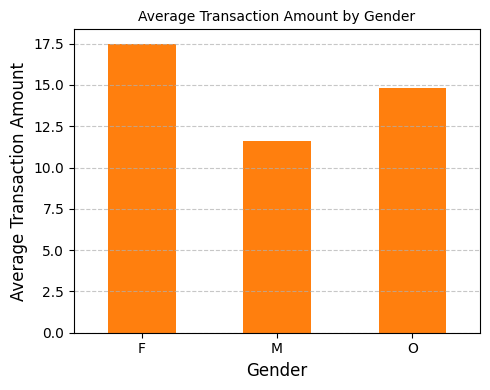

In [840]:
avg_transaction = transcript_profile.groupby('gender')['amount'].mean().reindex(['F', 'M', 'O'])

avg_transaction.plot(kind='bar', color='tab:orange', figsize=(5, 4))

plt.title('Average Transaction Amount by Gender', fontsize=10)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Transaction Amount', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

We have seen, the female spent the most, whereas the male were the least one.

In [841]:
transcript

,customer_id,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [842]:
def expand_offer_ids(data):
    '''
    INPUT:
        transcript: DataFrame containing offer and transaction information, including a 'value' column.
    
    PROCESS:
        Expands the 'value' column into separate columns, creates 'offer_id' column by prioritizing
        'offer_id' over 'offer id' where applicable.
    
    OUTPUT:
        DataFrame with expanded columns from 'value' and a consolidated 'offer_id'.
    '''
    
    values = data['value'].apply(pd.Series)

    values['offer_id'] = values.apply(lambda row: row['offer_id'] if pd.notna(row['offer_id']) else row['offer id'], axis=1)

    data = pd.concat([data, values], axis=1)
    return data


In [843]:
transcript = expand_offer_ids(transcript)
transcript.head()


,customer_id,event,value,time,offer id,amount,offer_id,reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,2906b810c7d4411798c6938adc9daaa5,NaN,2906b810c7d4411798c6938adc9daaa5,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,fafdcd668e3743c1bb461111dcafc2a4,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


In [844]:
# Calculate the number of offers received per person and add it as a new column
transcript['num_offers'] = transcript[transcript['event'] == 'offer received'].groupby('customer_id')['offer_id'].transform('count')

transcript['num_offers'].fillna(0, inplace=True)


transcript.head()


,customer_id,event,value,time,offer id,amount,offer_id,reward,num_offers
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,4.0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,5.0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,2906b810c7d4411798c6938adc9daaa5,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,4.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,fafdcd668e3743c1bb461111dcafc2a4,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,5.0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,5.0


In [845]:
event_categories = pd.get_dummies(transcript.event)
transcript = pd.concat([transcript, event_categories], axis=1)
transcript.head()

,customer_id,event,value,time,offer id,amount,offer_id,reward,num_offers,offer completed,offer received,offer viewed,transaction
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,4.0,False,True,False,False
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,5.0,False,True,False,False
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,2906b810c7d4411798c6938adc9daaa5,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,4.0,False,True,False,False
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,fafdcd668e3743c1bb461111dcafc2a4,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,5.0,False,True,False,False
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,5.0,False,True,False,False


Here, I will fit `1` in place of `True` and `0` in place `False`

In [846]:
transcript['offer completed'] = transcript['offer completed'].astype(int)
transcript['offer received'] = transcript['offer received'].astype(int)
transcript['offer viewed'] = transcript['offer viewed'].astype(int)
transcript['transaction'] = transcript['transaction'].astype(int)

In [847]:
transcript

,customer_id,event,value,time,offer id,amount,offer_id,reward,num_offers,offer completed,offer received,offer viewed,transaction
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,4.0,0,1,0,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,5.0,0,1,0,0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,2906b810c7d4411798c6938adc9daaa5,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,4.0,0,1,0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,fafdcd668e3743c1bb461111dcafc2a4,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,5.0,0,1,0,0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,5.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714,NaN,1.59,NaN,NaN,0.0,0,0,0,1
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714,NaN,9.53,NaN,NaN,0.0,0,0,0,1
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714,NaN,3.61,NaN,NaN,0.0,0,0,0,1
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714,NaN,3.53,NaN,NaN,0.0,0,0,0,1


In [848]:
transcript.drop(['reward','value','offer id'], axis=1, inplace=True)


In [849]:
transcript

,customer_id,event,time,amount,offer_id,num_offers,offer completed,offer received,offer viewed,transaction
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,4.0,0,1,0,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,5.0,0,1,0,0
2,e2127556f4f64592b11af22de27a7932,offer received,0,NaN,2906b810c7d4411798c6938adc9daaa5,4.0,0,1,0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,5.0,0,1,0,0
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,5.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,1.59,NaN,0.0,0,0,0,1
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,9.53,NaN,0.0,0,0,0,1
306531,a00058cf10334a308c68e7631c529907,transaction,714,3.61,NaN,0.0,0,0,0,1
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,3.53,NaN,0.0,0,0,0,1


In [873]:
transcript_portfolio = pd.merge(transcript, portfolio, how='left', on='offer_id')
transcript_portfolio.groupby(['offer_type','event']).customer_id.count()

offer_type     event          
bogo           offer completed    15669
               offer received     30499
               offer viewed       25449
discount       offer completed    17910
               offer received     30543
               offer viewed       21445
informational  offer received     15235
               offer viewed       10831
Name: customer_id, dtype: int64

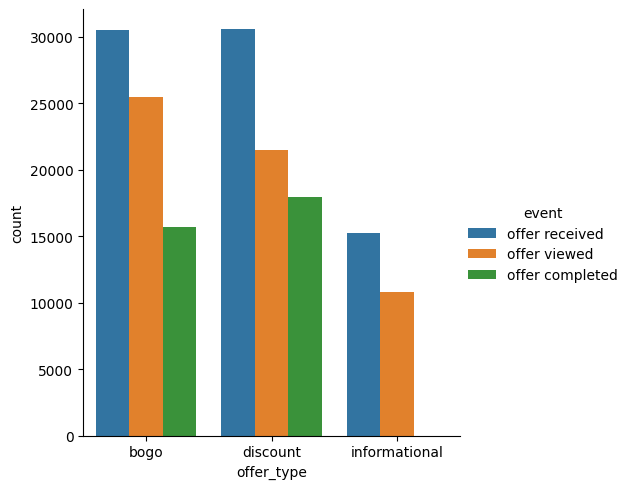

In [874]:
sns.catplot(data=transcript_portfolio[transcript_portfolio['event']!='transaction'], x='offer_type', kind='count', hue='event')

In [875]:
discount = transcript_portfolio[transcript_portfolio['offer_type']=='discount']
bogo = transcript_portfolio[transcript_portfolio['offer_type']=='bogo']

In [876]:
bogo.head()

,customer_id,event,time,amount,offer_id,num_offers,offer completed,offer received,offer viewed,transaction,...,duration,offer_type,email,mobile,social,web,bogo,discount,informational,active_offer
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,4.0,0,1,0,0,...,7.0,bogo,1.0,1.0,0.0,1.0,1.0,0.0,0.0,bogo_5.0_for_5.0_in_7.0days
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,5.0,0,1,0,0,...,5.0,bogo,1.0,1.0,1.0,1.0,1.0,0.0,0.0,bogo_10.0_for_10.0_in_5.0days
5,389bc3fa690240e798340f5a15918d5c,offer received,0,NaN,f19421c1d4aa40978ebb69ca19b0e20d,6.0,0,1,0,0,...,5.0,bogo,1.0,1.0,1.0,1.0,1.0,0.0,0.0,bogo_5.0_for_5.0_in_5.0days
12,4b0da7e80e5945209a1fdddfe813dbe0,offer received,0,NaN,ae264e3637204a6fb9bb56bc8210ddfd,5.0,0,1,0,0,...,7.0,bogo,1.0,1.0,1.0,0.0,1.0,0.0,0.0,bogo_10.0_for_10.0_in_7.0days
18,ebe7ef46ea6f4963a7dd49f501b26779,offer received,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,6.0,0,1,0,0,...,7.0,bogo,1.0,1.0,0.0,1.0,1.0,0.0,0.0,bogo_5.0_for_5.0_in_7.0days


In [877]:
discount.head()

,customer_id,event,time,amount,offer_id,num_offers,offer completed,offer received,offer viewed,transaction,...,duration,offer_type,email,mobile,social,web,bogo,discount,informational,active_offer
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,5.0,0,1,0,0,...,10.0,discount,1.0,0.0,0.0,1.0,0.0,1.0,0.0,discount_5.0_for_20.0_in_10.0days
2,e2127556f4f64592b11af22de27a7932,offer received,0,NaN,2906b810c7d4411798c6938adc9daaa5,4.0,0,1,0,0,...,7.0,discount,1.0,1.0,0.0,1.0,0.0,1.0,0.0,discount_2.0_for_10.0_in_7.0days
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,5.0,0,1,0,0,...,10.0,discount,1.0,1.0,1.0,1.0,0.0,1.0,0.0,discount_2.0_for_10.0_in_10.0days
6,c4863c7985cf408faee930f111475da3,offer received,0,NaN,2298d6c36e964ae4a3e7e9706d1fb8c2,3.0,0,1,0,0,...,7.0,discount,1.0,1.0,1.0,1.0,0.0,1.0,0.0,discount_3.0_for_7.0_in_7.0days
8,aa4862eba776480b8bb9c68455b8c2e1,offer received,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,5.0,0,1,0,0,...,10.0,discount,1.0,0.0,0.0,1.0,0.0,1.0,0.0,discount_5.0_for_20.0_in_10.0days


In [878]:
bogo_discount_ = pd.concat([bogo, discount], ignore_index=True)

In [879]:
bogo_discount_.head()

,customer_id,event,time,amount,offer_id,num_offers,offer completed,offer received,offer viewed,transaction,...,duration,offer_type,email,mobile,social,web,bogo,discount,informational,active_offer
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,4.0,0,1,0,0,...,7.0,bogo,1.0,1.0,0.0,1.0,1.0,0.0,0.0,bogo_5.0_for_5.0_in_7.0days
1,68617ca6246f4fbc85e91a2a49552598,offer received,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,5.0,0,1,0,0,...,5.0,bogo,1.0,1.0,1.0,1.0,1.0,0.0,0.0,bogo_10.0_for_10.0_in_5.0days
2,389bc3fa690240e798340f5a15918d5c,offer received,0,NaN,f19421c1d4aa40978ebb69ca19b0e20d,6.0,0,1,0,0,...,5.0,bogo,1.0,1.0,1.0,1.0,1.0,0.0,0.0,bogo_5.0_for_5.0_in_5.0days
3,4b0da7e80e5945209a1fdddfe813dbe0,offer received,0,NaN,ae264e3637204a6fb9bb56bc8210ddfd,5.0,0,1,0,0,...,7.0,bogo,1.0,1.0,1.0,0.0,1.0,0.0,0.0,bogo_10.0_for_10.0_in_7.0days
4,ebe7ef46ea6f4963a7dd49f501b26779,offer received,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,6.0,0,1,0,0,...,7.0,bogo,1.0,1.0,0.0,1.0,1.0,0.0,0.0,bogo_5.0_for_5.0_in_7.0days


### Which offer make most impact ?

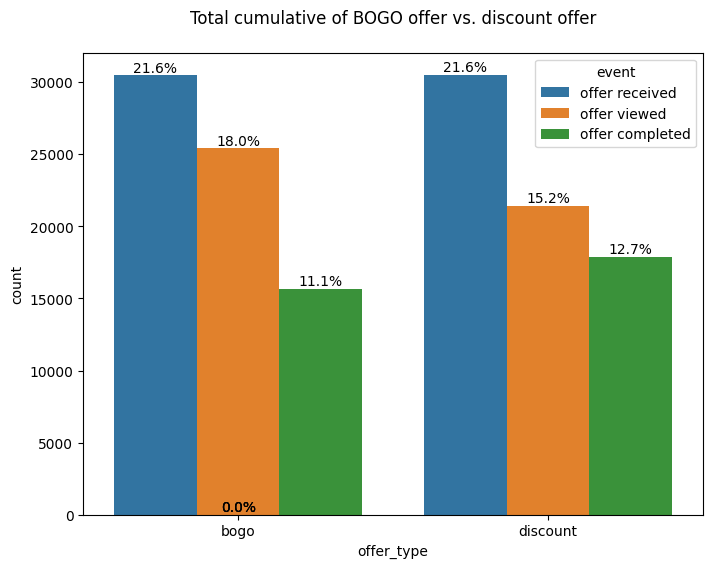

In [880]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x="offer_type", hue="event", data=bogo_discount_)

total = len(bogo_discount_)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Add title
plt.title("Total cumulative of BOGO offer vs. discount offer\n", fontsize=12)
plt.show()

In [881]:
def compute_success_flags(data):
    '''
       This function identifies success and unviewed success flags from rows labeled as 'offer completed'.

        INPUT:
            df : pandas DataFrame
                The dataset containing 'offer completed' records and other transaction details.

        PROCESS:
            - Identify rows where the offer was completed.
            - Create flags to mark whether the offer was a success and whether it was viewed.

        OUTPUT:
            offers_completed : pandas DataFrame
                A dataframe with the newly added success and unviewed success flags for each 'offer completed' record.
    '''
    
    completed_offers = data[['customer_id', 'event', 'time', 'offer_id', 'num_offers']].sort_values(['customer_id', 'time'])
    completed_offers = completed_offers[(completed_offers['event'] == 'offer viewed') | (completed_offers['event'] == 'offer completed')]

    # Shift offer_id for comparison within customer and offer groups
    completed_offers['previous_offer_id'] = completed_offers.groupby(['customer_id', 'offer_id'])['offer_id'].shift()

    # Success: offer viewed and completed
    completed_offers['success'] = np.where(
        (completed_offers['event'] == 'offer completed') & (completed_offers['previous_offer_id'] == completed_offers['offer_id']),
        1, 0
    )

    # Unviewed success: offer completed but not viewed
    completed_offers['unviewed_success'] = np.where(
        (completed_offers['event'] == 'offer completed') & (completed_offers['previous_offer_id'].isna()),
        1, 0
    )
    
    completed_offers.drop(['previous_offer_id'], axis=1, inplace=True)
    
    return completed_offers


In [882]:
def merge_with_received_offers(data, completed_offers):
    '''
       
        Merges received offers with success and unviewed success flags from completed offers.

        INPUT:
            data : pandas DataFrame
                DataFrame containing raw event data, including 'offer received' events.

            offers_completed : pandas DataFrame
                DataFrame containing records of 'offer completed' events along with success and unviewed success flags.

        PROCESS:
            - Filter 'offer received' events from the raw data.
            - Merge the filtered received offers with the offers_completed dataframe on relevant columns.

        OUTPUT:
            merged : pandas DataFrame
                A combined DataFrame that includes both received offers and the success/unviewed success flags from completed offers.

    '''
    received_offers = data[['customer_id', 'event', 'time', 'offer_id', 'num_offers']][data['event'] == 'offer received'].sort_values(['customer_id', 'time'])

    # Combine received and completed offers
    merged = pd.concat([received_offers, completed_offers]).sort_values(['customer_id', 'time'])
    
    return merged


In [883]:
def transmit_success_info(together):
    '''
        Transmits success and unviewed success flags from 'offer completed' rows to corresponding 'offer received' rows.

        INPUT:
            together : pandas DataFrame
                A combined DataFrame that contains both 'offer received' and 'offer completed' events.

        PROCESS:
            - For each customer, identify 'offer completed' events and the corresponding 'offer received' rows.
            - Transmit the success and unviewed success flags from the 'offer completed' rows to the associated 'offer received' rows.

        OUTPUT:
            result : pandas DataFrame
                A DataFrame where the 'offer received' rows have the appropriate success or failure flags transmitted from the 'offer completed' rows.
    '''

    successes = together[(together['event'] == 'offer received') | (together['event'] == 'offer completed')]
    successes['success'] = successes.groupby(['customer_id', 'offer_id'])['success'].bfill()
    successes['unviewed_success'] = successes.groupby(['customer_id', 'offer_id'])['unviewed_success'].bfill()

    outcome = successes[successes['event'] == 'offer received']
    
    # Classify failures and fill missing values
    outcome['failure'] = np.where((outcome['success'].isna()) & (outcome['unviewed_success'].isna()), 1, 0)
    outcome['success'] = outcome['success'].fillna(0).astype(int)
    outcome['unviewed_success'] = outcome['unviewed_success'].fillna(0).astype(int)
    
    return outcome


In [884]:
def build_outcome_column(outcome):
    '''
        Builds the 'outcome' and 'outcome_factor' columns based on success and failure flags.

        INPUT:
            result : pandas DataFrame
                A DataFrame that contains success and failure flags for each offer.

        PROCESS:
            1. Create a new 'outcome' column:
               - If the success flag is True, mark the outcome as 'Success'.
               - If the failure flag is True, mark the outcome as 'Failure'.
               - Otherwise, mark the outcome as 'Unviewed' or 'In Progress'.

            2. Add an 'outcome_factor' column which encodes the outcomes as:
               - Success = 1
               - Failure = 0
               - Unviewed or In Progress = -1 (or any other encoding as needed).

        OUTPUT:
            result : pandas DataFrame
                A DataFrame with two additional columns:
                - 'outcome' : Categorical representation of the offer's result.
                - 'outcome_factor' : Numerical encoding of the outcome.
    '''

    outcome['outcome'] = np.where(outcome['success'] == 1, 'success',
                                 np.where(outcome['unviewed_success'] == 1, 'unviewed success', 'failure'))

    outcome_map = {'failure': 0, 'unviewed success': 1, 'success': 2}
    outcome['outcome_factor'] = outcome['outcome'].map(outcome_map)
    
    return outcome


In [885]:
def prepare_final_dataframe(outcome, portfolio, profile):
    '''
        Merges customer and offer data for final analysis.

        INPUT:
            result : DataFrame with offer outcomes
            portfolio : DataFrame with offer details
            profile : DataFrame with customer info

        PROCESS:
            - Merge 'result' with 'portfolio' on offer ID.
            - Merge with 'profile' on customer ID.
            - Clean and ensure no missing values.

        OUTPUT:
            merged : Final cleaned DataFrame for analysis.
    '''

    merged = pd.merge(outcome, portfolio, how='left', on='offer_id')
    merged = pd.merge(merged, profile, how='left', on='customer_id')
    merged.drop(['event', 'became_member_on'], axis=1, inplace=True)
    
    return merged


In [886]:
def prepare_offer_completion(data):
    '''
        Cleans the dataframe for analysis on offer completion.

        INPUT:
            df : DataFrame to clean
            portfolio : DataFrame with offer details
            profile : DataFrame with customer info

        OUTPUT:
            combined : Cleaned DataFrame for analysis.
    '''

    pd.options.mode.chained_assignment = None
    
    # Step 1: Compute success and unviewed success flags
    offers_completed = compute_success_flags(data)
    
    # Step 2: Merge with received offers
    together = merge_with_received_offers(data, offers_completed)
    
    # Step 3: Transmit success info
    result = transmit_success_info(together)
    
    # Step 4: Build outcome column
    result = build_outcome_column(result)
    
    # Step 5: Prepare final dataframe
    combined = prepare_final_dataframe(result, portfolio, profile)
    
    pd.options.mode.chained_assignment = "warn"
    
    return combined


In [887]:
new_bogo = prepare_offer_completion(bogo)
new_discount = prepare_offer_completion(discount)


In [888]:
new_bogo_discount = pd.concat([new_bogo, new_discount], ignore_index=True)


In [889]:
new_bogo_discount.head()

,customer_id,time,offer_id,num_offers,success,unviewed_success,failure,outcome,outcome_factor,reward,...,social,web,bogo,discount,informational,active_offer,gender,age,income,membership_duration
0,0009655768c64bdeb2e877511632db8f,408,f19421c1d4aa40978ebb69ca19b0e20d,5.0,0,1,0,unviewed success,1,5.0,...,1.0,1.0,1.0,0.0,0.0,bogo_5.0_for_5.0_in_5.0days,M,33.0,72000.0,2717.0
1,00116118485d4dfda04fdbaba9a87b5c,168,f19421c1d4aa40978ebb69ca19b0e20d,2.0,0,0,1,failure,0,5.0,...,1.0,1.0,1.0,0.0,0.0,bogo_5.0_for_5.0_in_5.0days,NaN,NaN,NaN,NaN
2,00116118485d4dfda04fdbaba9a87b5c,576,f19421c1d4aa40978ebb69ca19b0e20d,2.0,0,0,1,failure,0,5.0,...,1.0,1.0,1.0,0.0,0.0,bogo_5.0_for_5.0_in_5.0days,NaN,NaN,NaN,NaN
3,0011e0d4e6b944f998e987f904e8c1e5,504,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,1,0,0,success,2,5.0,...,0.0,1.0,1.0,0.0,0.0,bogo_5.0_for_5.0_in_7.0days,O,40.0,57000.0,2454.0
4,0020c2b971eb4e9188eac86d93036a77,168,ae264e3637204a6fb9bb56bc8210ddfd,5.0,0,0,1,failure,0,10.0,...,1.0,0.0,1.0,0.0,0.0,bogo_10.0_for_10.0_in_7.0days,F,59.0,90000.0,3130.0


In [890]:
check_missing_values(new_bogo_discount)

,Missing Values,Percentage (%)
gender,7841,12.845254
age,7841,12.845254
income,7841,12.845254
membership_duration,7841,12.845254


In [892]:
def construct_offer_transect(raw_data):
    '''
        INPUT:
            data : Raw DataFrame with offer and transaction information.

        PROCESS:
            Cleans and processes the dataset for transaction analysis during offer validity.

        OUTPUT:
            cleaned_data : Refined DataFrame ready for further analysis.
    '''

    
    # Convert duration from days to hours
    raw_data['duration_hours'] = pd.to_timedelta(raw_data['duration'], unit='D').dt.total_seconds() / 3600
    
    # Calculate the end time for offers
    raw_data['offer_end_time'] = np.where(raw_data['event'] == 'offer received', 
                                           raw_data['time'] + raw_data['duration_hours'], 
                                           np.nan)
    raw_data['offer_end_time'] = raw_data.groupby('customer_id')['offer_end_time'].ffill()
    raw_data['time_remaining'] = raw_data['offer_end_time'] - raw_data['time']

    # Forward fill the offer for transactions occurring within the valid period
    raw_data['active_offer'] = np.where((raw_data['event'] == 'transaction') & (raw_data['time_remaining'] >= 0), 
                                         raw_data['active_offer'].ffill(), 
                                         raw_data['active_offer'])

    # Filter out transactions that do not have a corresponding offer
    filtered_data = raw_data[~raw_data['active_offer'].isna()]

    # Aggregate transaction amounts during the offer validity
    relevant_data = filtered_data[(filtered_data['event'] == 'offer viewed') | 
                                   (filtered_data['event'] == 'transaction')]
    
    transaction_sums = relevant_data.groupby(['customer_id', 'active_offer'])['amount'].sum().reset_index()
    transaction_sums.rename(columns={'amount': 'total_amount'}, inplace=True)

    # Merge transaction sums back into the relevant data
    merged_data = pd.merge(relevant_data, transaction_sums, how='left', on=['customer_id', 'active_offer'])
    merged_data['amount'] = np.where(merged_data['event'] == 'offer viewed', 
                                       merged_data['total_amount'], 
                                       merged_data['amount'])

    # Reconstruct the dataset, retaining only 'offer received' events
    cleaned_data = filtered_data[filtered_data['event'] == 'offer received']
    cleaned_data = pd.concat([cleaned_data, merged_data]).sort_values(['customer_id', 'time'])
    
    cleaned_data.drop(columns=['duration_hours', 'offer_end_time', 'time_remaining', 'total_amount'], inplace=True)

    # Shift amount for transactions to associate them with 'offer received'
    transactions = cleaned_data[cleaned_data['event'] == 'transaction']
    cleaned_data['amount'] = cleaned_data.groupby(['customer_id', 'active_offer'])['amount'].shift(-1).fillna(0)
    cleaned_data = cleaned_data[cleaned_data['event'] == 'offer received']
    
    # Success indicators
    cleaned_data['success'] = (cleaned_data['amount'] > 0).astype(int)
    cleaned_data['unviewed_success'] = 0  # Indicates the offer was not viewed
    cleaned_data['failure'] = 0  # Indicates no failure
    cleaned_data['outcome'] = 2  # Indicates neutral outcome
    cleaned_data['outcome_factor'] = 0  # No specific outcome factor
    
    # Merge customer profile data
    cleaned_data = pd.merge(cleaned_data, profile, how='left', on='customer_id')
    cleaned_data.drop(['event', 'became_member_on'], axis=1, inplace=True)

    return cleaned_data

In [893]:
data = transcript_portfolio.copy()

In [894]:
check_missing_values(data)

,Missing Values,Percentage (%)
amount,167581,54.669629
offer_id,138953,45.330371
reward,138953,45.330371
difficulty,138953,45.330371
duration,138953,45.330371
offer_type,138953,45.330371
email,138953,45.330371
mobile,138953,45.330371
social,138953,45.330371
web,138953,45.330371


In [895]:
data = data[(data['offer_type']== 'informational') | (data['event'] =='transaction')]

In [896]:
data = data.sort_values(['customer_id', 'time']) 
data = construct_offer_transect(data)
data.head(5)

,customer_id,time,amount,offer_id,num_offers,offer completed,offer received,offer viewed,transaction,reward,...,active_offer,success,unviewed_success,failure,outcome,outcome_factor,gender,age,income,membership_duration
0,0009655768c64bdeb2e877511632db8f,168,22.16,5a8bc65990b245e5a138643cd4eb9837,5.0,0,1,0,0,0.0,...,informational_0.0_for_0.0_in_3.0days,1,0,0,2,0,M,33.0,72000.0,2717.0
1,0009655768c64bdeb2e877511632db8f,336,8.57,3f207df678b143eea3cee63160fa8bed,5.0,0,1,0,0,0.0,...,informational_0.0_for_0.0_in_4.0days,1,0,0,2,0,M,33.0,72000.0,2717.0
2,0011e0d4e6b944f998e987f904e8c1e5,0,0.00,3f207df678b143eea3cee63160fa8bed,5.0,0,1,0,0,0.0,...,informational_0.0_for_0.0_in_4.0days,0,0,0,2,0,O,40.0,57000.0,2454.0
3,0011e0d4e6b944f998e987f904e8c1e5,336,0.00,5a8bc65990b245e5a138643cd4eb9837,5.0,0,1,0,0,0.0,...,informational_0.0_for_0.0_in_3.0days,0,0,0,2,0,O,40.0,57000.0,2454.0
4,0020c2b971eb4e9188eac86d93036a77,504,17.24,5a8bc65990b245e5a138643cd4eb9837,5.0,0,1,0,0,0.0,...,informational_0.0_for_0.0_in_3.0days,1,0,0,2,0,F,59.0,90000.0,3130.0


In [897]:
data = data.drop(columns=['amount'])


In [898]:
data

,customer_id,time,offer_id,num_offers,offer completed,offer received,offer viewed,transaction,reward,difficulty,...,active_offer,success,unviewed_success,failure,outcome,outcome_factor,gender,age,income,membership_duration
0,0009655768c64bdeb2e877511632db8f,168,5a8bc65990b245e5a138643cd4eb9837,5.0,0,1,0,0,0.0,0.0,...,informational_0.0_for_0.0_in_3.0days,1,0,0,2,0,M,33.0,72000.0,2717.0
1,0009655768c64bdeb2e877511632db8f,336,3f207df678b143eea3cee63160fa8bed,5.0,0,1,0,0,0.0,0.0,...,informational_0.0_for_0.0_in_4.0days,1,0,0,2,0,M,33.0,72000.0,2717.0
2,0011e0d4e6b944f998e987f904e8c1e5,0,3f207df678b143eea3cee63160fa8bed,5.0,0,1,0,0,0.0,0.0,...,informational_0.0_for_0.0_in_4.0days,0,0,0,2,0,O,40.0,57000.0,2454.0
3,0011e0d4e6b944f998e987f904e8c1e5,336,5a8bc65990b245e5a138643cd4eb9837,5.0,0,1,0,0,0.0,0.0,...,informational_0.0_for_0.0_in_3.0days,0,0,0,2,0,O,40.0,57000.0,2454.0
4,0020c2b971eb4e9188eac86d93036a77,504,5a8bc65990b245e5a138643cd4eb9837,5.0,0,1,0,0,0.0,0.0,...,informational_0.0_for_0.0_in_3.0days,1,0,0,2,0,F,59.0,90000.0,3130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15230,fff0f0aac6c547b9b263080f09a5586a,576,3f207df678b143eea3cee63160fa8bed,3.0,0,1,0,0,0.0,0.0,...,informational_0.0_for_0.0_in_4.0days,1,0,0,2,0,M,67.0,80000.0,2662.0
15231,fff3ba4757bd42088c044ca26d73817a,336,5a8bc65990b245e5a138643cd4eb9837,6.0,0,1,0,0,0.0,0.0,...,informational_0.0_for_0.0_in_3.0days,0,0,0,2,0,F,69.0,83000.0,3296.0
15232,fff3ba4757bd42088c044ca26d73817a,504,5a8bc65990b245e5a138643cd4eb9837,6.0,0,1,0,0,0.0,0.0,...,informational_0.0_for_0.0_in_3.0days,1,0,0,2,0,F,69.0,83000.0,3296.0
15233,fff8957ea8b240a6b5e634b6ee8eafcf,504,3f207df678b143eea3cee63160fa8bed,3.0,0,1,0,0,0.0,0.0,...,informational_0.0_for_0.0_in_4.0days,1,0,0,2,0,M,71.0,56000.0,2414.0


In [1116]:
final_data = pd.concat([new_bogo_discount, data])

In [1117]:

final_data

,customer_id,time,offer_id,num_offers,success,unviewed_success,failure,outcome,outcome_factor,reward,...,informational,active_offer,gender,age,income,membership_duration,offer completed,offer received,offer viewed,transaction
0,0009655768c64bdeb2e877511632db8f,408,f19421c1d4aa40978ebb69ca19b0e20d,5.0,0,1,0,unviewed success,1,5.0,...,0.0,bogo_5.0_for_5.0_in_5.0days,M,33.0,72000.0,2717.0,NaN,NaN,NaN,NaN
1,00116118485d4dfda04fdbaba9a87b5c,168,f19421c1d4aa40978ebb69ca19b0e20d,2.0,0,0,1,failure,0,5.0,...,0.0,bogo_5.0_for_5.0_in_5.0days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00116118485d4dfda04fdbaba9a87b5c,576,f19421c1d4aa40978ebb69ca19b0e20d,2.0,0,0,1,failure,0,5.0,...,0.0,bogo_5.0_for_5.0_in_5.0days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0011e0d4e6b944f998e987f904e8c1e5,504,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,1,0,0,success,2,5.0,...,0.0,bogo_5.0_for_5.0_in_7.0days,O,40.0,57000.0,2454.0,NaN,NaN,NaN,NaN
4,0020c2b971eb4e9188eac86d93036a77,168,ae264e3637204a6fb9bb56bc8210ddfd,5.0,0,0,1,failure,0,10.0,...,0.0,bogo_10.0_for_10.0_in_7.0days,F,59.0,90000.0,3130.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15230,fff0f0aac6c547b9b263080f09a5586a,576,3f207df678b143eea3cee63160fa8bed,3.0,1,0,0,2,0,0.0,...,1.0,informational_0.0_for_0.0_in_4.0days,M,67.0,80000.0,2662.0,0.0,1.0,0.0,0.0
15231,fff3ba4757bd42088c044ca26d73817a,336,5a8bc65990b245e5a138643cd4eb9837,6.0,0,0,0,2,0,0.0,...,1.0,informational_0.0_for_0.0_in_3.0days,F,69.0,83000.0,3296.0,0.0,1.0,0.0,0.0
15232,fff3ba4757bd42088c044ca26d73817a,504,5a8bc65990b245e5a138643cd4eb9837,6.0,1,0,0,2,0,0.0,...,1.0,informational_0.0_for_0.0_in_3.0days,F,69.0,83000.0,3296.0,0.0,1.0,0.0,0.0
15233,fff8957ea8b240a6b5e634b6ee8eafcf,504,3f207df678b143eea3cee63160fa8bed,3.0,1,0,0,2,0,0.0,...,1.0,informational_0.0_for_0.0_in_4.0days,M,71.0,56000.0,2414.0,0.0,1.0,0.0,0.0


In [1118]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76277 entries, 0 to 15234
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          76277 non-null  object 
 1   time                 76277 non-null  int64  
 2   offer_id             76277 non-null  object 
 3   num_offers           76277 non-null  float64
 4   success              76277 non-null  int64  
 5   unviewed_success     76277 non-null  int64  
 6   failure              76277 non-null  int64  
 7   outcome              76277 non-null  object 
 8   outcome_factor       76277 non-null  int64  
 9   reward               76277 non-null  float64
 10  difficulty           76277 non-null  float64
 11  duration             76277 non-null  float64
 12  offer_type           76277 non-null  object 
 13  email                76277 non-null  float64
 14  mobile               76277 non-null  float64
 15  social               76277 non-null  floa

In [1119]:
print('The total counts of different events for BOGO offer is')
print(bogo.event.value_counts())

print('\n\nThe total counts of different events for discount offer is')
print(discount.event.value_counts())

The total counts of different events for BOGO offer is
event
offer received     30499
offer viewed       25449
offer completed    15669
Name: count, dtype: int64


The total counts of different events for discount offer is
event
offer received     30543
offer viewed       21445
offer completed    17910
Name: count, dtype: int64


Lets plot data with final_data counts for BOGO v/s discount offer

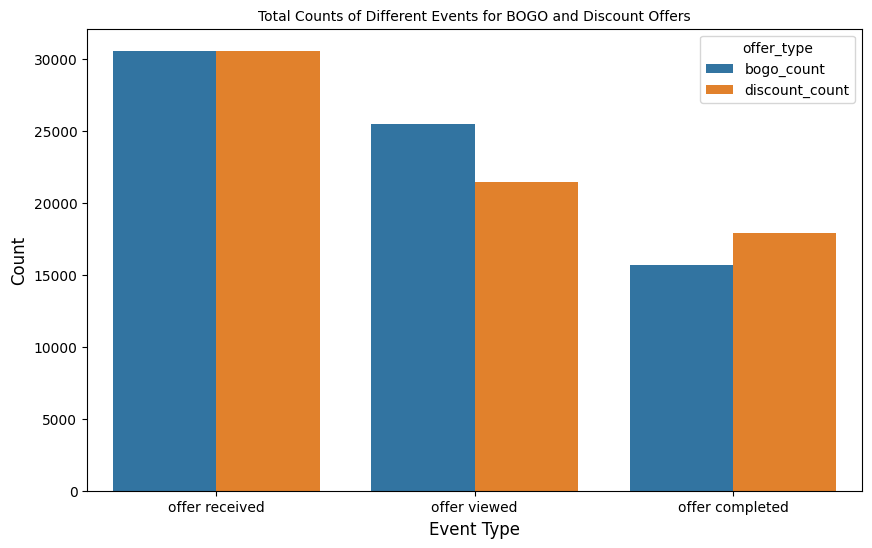

In [1120]:

bogo_event_counts = bogo['event'].value_counts()
discount_event_counts = discount['event'].value_counts()

# Create a DataFrame for plotting
event_counts_df = pd.DataFrame({
    'event': bogo_event_counts.index,
    'bogo_count': bogo_event_counts.values,
    'discount_count': discount_event_counts.reindex(bogo_event_counts.index).values
})

# Melt the DataFrame to long format for easy plotting
event_counts_melted = event_counts_df.melt(id_vars='event', var_name='offer_type', value_name='count')


plt.figure(figsize=(10, 6))
sns.barplot(x='event', y='count', hue='offer_type', data=event_counts_melted)


plt.title('Total Counts of Different Events for BOGO and Discount Offers', fontsize=10)
plt.xlabel('Event Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()


In [1121]:
pd.DataFrame(final_data.groupby(['active_offer'])['success'].mean()).reset_index().sort_values('success', ascending=False)

,active_offer,success
8,informational_0.0_for_0.0_in_3.0days,0.676424
4,discount_2.0_for_10.0_in_10.0days,0.649204
9,informational_0.0_for_0.0_in_4.0days,0.647368
6,discount_3.0_for_7.0_in_7.0days,0.617578
2,bogo_5.0_for_5.0_in_5.0days,0.515388
0,bogo_10.0_for_10.0_in_5.0days,0.400369
1,bogo_10.0_for_10.0_in_7.0days,0.384565
3,bogo_5.0_for_5.0_in_7.0days,0.340888
5,discount_2.0_for_10.0_in_7.0days,0.333988
7,discount_5.0_for_20.0_in_10.0days,0.216875


Let's examine performance of bogo and discount offer and compare them with each other

In [1122]:
def offer_performance(data):
    '''
        INPUT:
            bogo/discount as data
        
        PROCESS:
            Calculate performance metrics for an offer based on event counts.
            The function returns a list of performance ratios:
                - offer_completed / offer_received
                - offer_viewed / offer_received
                - offer_completed / offer_viewed

        OUTPUT:
            performance_list
    '''
    
   
    cumulative = data['event'].value_counts().tolist()
    
    offer_get, offer_viewed, offer_complated = cumulative
    
    performance_list = [offer_complated/offer_get, offer_viewed/offer_get, offer_complated/offer_viewed]
    
    return performance_list

    

In [1123]:
def print_performance(offer_type, name):
    performance = offer_performance(offer_type)
    print("The performance of {}: \ncompleted/received: {}%, \nviewed/received: {}%, \ncompleted/viewed: {}%".format(name, round(performance[0]*100,2), round(performance[1]*100,2), round(performance[2]*100,2)))


In [1124]:
print_performance(bogo, 'Bogo')

The performance of Bogo: 
completed/received: 51.38%, 
viewed/received: 83.44%, 
completed/viewed: 61.57%


In [1125]:
print_performance(discount, 'discount')

The performance of discount: 
completed/received: 58.64%, 
viewed/received: 70.21%, 
completed/viewed: 83.52%


### Comparison of BOGO and Discount Offer Performance:

1. **Completed/Received**:
   - **BOGO**: 51.38%
   - **Discount**: 58.64%
   
   The Discount offer has a higher completion rate relative to the number of offers received, indicating that recipients are more likely to complete a Discount offer compared to a BOGO offer.

2. **Viewed/Received**:
   - **BOGO**: 83.44%
   - **Discount**: 70.21%
   
   BOGO offers have a significantly higher viewing rate relative to the number of offers received. This suggests that recipients are more likely to view BOGO offers than Discount offers.

3. **Completed/Viewed**:
   - **BOGO**: 61.57%
   - **Discount**: 83.52%
   
   Discount offers outperform BOGO offers in terms of the number of completed offers relative to the number viewed. This means that if a recipient views a Discount offer, they are more likely to complete it than if they view a BOGO offer.

### Conclusion:
While **BOGO offers** have a higher view rate, **Discount offers** are more successful overall because they have a higher completion rate both in terms of offers received and offers viewed. Therefore, **Discount offers are more successful** in driving completion and action from recipients.

Now we will
### Predict the Offers Success

In [1126]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def classification_report_starbuck(y_test, y_pred):
    '''
        INPUT:
            y_test : array-like, shape (n_samples,)
                True labels for the test set.

            y_pred : array-like, shape (n_samples,)
                Predicted labels from the model.

        PROCESS:
            Generates a classification report by calculating precision, recall, f1-score, support, and accuracy.

        OUTPUT:
            DataFrame containing precision, recall, f1-score, support, and accuracy.
    '''
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    support = y_test.shape[0]  # Total number of samples in y_test
    accuracy = accuracy_score(y_test, y_pred)

    # Store the results in a dictionary
    report_sb = {
        'precision': round(precision, 2),
        'recall': round(recall, 2),
        'f1-score': round(f1, 2),
        'support': support,
        'accuracy': round(accuracy, 2)
    }
    
    # Convert the dictionary to a DataFrame
    return pd.DataFrame([report_sb])

In [1127]:
check_missing_values(final_data)

,Missing Values,Percentage (%)
offer completed,61042,80.026745
offer received,61042,80.026745
offer viewed,61042,80.026745
transaction,61042,80.026745
gender,9776,12.816445
age,9776,12.816445
income,9776,12.816445
membership_duration,9776,12.816445


There are number of Null value in `final_data`. So, we'll drop them.

In [1128]:
final_data = final_data.dropna(how='any', axis=0)
final_data

,customer_id,time,offer_id,num_offers,success,unviewed_success,failure,outcome,outcome_factor,reward,...,informational,active_offer,gender,age,income,membership_duration,offer completed,offer received,offer viewed,transaction
0,0009655768c64bdeb2e877511632db8f,168,5a8bc65990b245e5a138643cd4eb9837,5.0,1,0,0,2,0,0.0,...,1.0,informational_0.0_for_0.0_in_3.0days,M,33.0,72000.0,2717.0,0.0,1.0,0.0,0.0
1,0009655768c64bdeb2e877511632db8f,336,3f207df678b143eea3cee63160fa8bed,5.0,1,0,0,2,0,0.0,...,1.0,informational_0.0_for_0.0_in_4.0days,M,33.0,72000.0,2717.0,0.0,1.0,0.0,0.0
2,0011e0d4e6b944f998e987f904e8c1e5,0,3f207df678b143eea3cee63160fa8bed,5.0,0,0,0,2,0,0.0,...,1.0,informational_0.0_for_0.0_in_4.0days,O,40.0,57000.0,2454.0,0.0,1.0,0.0,0.0
3,0011e0d4e6b944f998e987f904e8c1e5,336,5a8bc65990b245e5a138643cd4eb9837,5.0,0,0,0,2,0,0.0,...,1.0,informational_0.0_for_0.0_in_3.0days,O,40.0,57000.0,2454.0,0.0,1.0,0.0,0.0
4,0020c2b971eb4e9188eac86d93036a77,504,5a8bc65990b245e5a138643cd4eb9837,5.0,1,0,0,2,0,0.0,...,1.0,informational_0.0_for_0.0_in_3.0days,F,59.0,90000.0,3130.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15230,fff0f0aac6c547b9b263080f09a5586a,576,3f207df678b143eea3cee63160fa8bed,3.0,1,0,0,2,0,0.0,...,1.0,informational_0.0_for_0.0_in_4.0days,M,67.0,80000.0,2662.0,0.0,1.0,0.0,0.0
15231,fff3ba4757bd42088c044ca26d73817a,336,5a8bc65990b245e5a138643cd4eb9837,6.0,0,0,0,2,0,0.0,...,1.0,informational_0.0_for_0.0_in_3.0days,F,69.0,83000.0,3296.0,0.0,1.0,0.0,0.0
15232,fff3ba4757bd42088c044ca26d73817a,504,5a8bc65990b245e5a138643cd4eb9837,6.0,1,0,0,2,0,0.0,...,1.0,informational_0.0_for_0.0_in_3.0days,F,69.0,83000.0,3296.0,0.0,1.0,0.0,0.0
15233,fff8957ea8b240a6b5e634b6ee8eafcf,504,3f207df678b143eea3cee63160fa8bed,3.0,1,0,0,2,0,0.0,...,1.0,informational_0.0_for_0.0_in_4.0days,M,71.0,56000.0,2414.0,0.0,1.0,0.0,0.0


In [1129]:
final_data.isnull().sum()

customer_id            0
time                   0
offer_id               0
num_offers             0
success                0
unviewed_success       0
failure                0
outcome                0
outcome_factor         0
reward                 0
difficulty             0
duration               0
offer_type             0
email                  0
mobile                 0
social                 0
web                    0
bogo                   0
discount               0
informational          0
active_offer           0
gender                 0
age                    0
income                 0
membership_duration    0
offer completed        0
offer received         0
offer viewed           0
transaction            0
dtype: int64

Now. we have clear data. let's do more further...

In [1130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import LabelEncoder

from sklearn.datasets import make_classification

In [1131]:
final_data.shape

(13300, 29)

In [1132]:
final_data['offer_type']

0        informational
1        informational
2        informational
3        informational
4        informational
             ...      
15230    informational
15231    informational
15232    informational
15233    informational
15234    informational
Name: offer_type, Length: 13300, dtype: object

In [1133]:
final_data['outcome'] = final_data['outcome'].astype(int)

/tmp/ipykernel_13/1820080112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['outcome'] = final_data['outcome'].astype(int)


In [1134]:
final_data.dtypes == object

customer_id             True
time                   False
offer_id                True
num_offers             False
success                False
unviewed_success       False
failure                False
outcome                False
outcome_factor         False
reward                 False
difficulty             False
duration               False
offer_type              True
email                  False
mobile                 False
social                 False
web                    False
bogo                   False
discount               False
informational          False
active_offer            True
gender                  True
age                    False
income                 False
membership_duration    False
offer completed        False
offer received         False
offer viewed           False
transaction            False
dtype: bool

In [1135]:
def classification_ml_model(data, target, model_classifier):
    
    # features    
    X = data.drop(columns=['success', 'customer_id', 'offer_id', 'active_offer', 'offer_type', 'gender', ])

    # label variable to predict
    y = data[target]
    
    # split data into training and test sets     
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) 
    
    model_class = model_classifier
    
    model_class.fit(X_train, y_train)
    
    model_prediction = model_class.predict(X_test)

    
    return X_train, X_test, y_train, y_test, model_prediction, model_class

In [1136]:
def display_results(y_test, y_pred):
    labels = np.unique(y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
    accuracy = (y_pred == y_test).mean()

    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)

#### We will train two models 
   - Decision Tree
   - Random Forest 
   
   
## Let's examine our `final_data` on Decision Tree

In [1137]:
X_train, X_test, y_train, y_test, dtree_prediction, dtree_model = classification_ml_model(
    final_data,
    'success',
    DecisionTreeClassifier(random_state=42)
    )

In [1138]:
display_results(y_test, dtree_prediction)

Labels: [0 1]
Confusion Matrix:
 [[ 567  730]
 [ 853 1840]]
Accuracy: 0.6032581453634085


In [1139]:
classification_report_starbuck(y_test, dtree_prediction)

,precision,recall,f1-score,support,accuracy
0,0.61,0.6,0.61,3990,0.6


**Precision: 0.61** — This indicates that 61% of the positive identifications made by the model were correct.

**Recall: 0.60** — The model was able to identify 60% of the actual positive cases, highlighting the model's effectiveness in recognizing relevant instances.

**F1-Score: 0.61** — The harmonic mean of precision and recall, which balances both metrics, showing a satisfactory performance overall.

**Support: 3990** — This is the number of actual occurrences of the positive class in the dataset, providing a context for the precision and recall values.

**Accuracy: 0.60** — The overall accuracy of the model, indicating that it correctly predicted 60% of the total instances.

### Let's focus on Random Forest Classifier

In [1140]:
X_train, X_test, y_train, y_test, rfc_prediction, rfc_model = classification_ml_model(
    final_data,
    'success',
    RandomForestClassifier(max_depth=25, random_state=42)
    )

In [1141]:
display_results(y_test, rfc_prediction)

Labels: [0 1]
Confusion Matrix:
 [[ 410  887]
 [ 469 2224]]
Accuracy: 0.6601503759398496


In [1142]:
classification_report_starbuck(y_test, rfc_prediction)

,precision,recall,f1-score,support,accuracy
0,0.63,0.66,0.64,3990,0.66


### Try Gradient Boosting Classifier

In [1143]:
model = GradientBoostingClassifier(random_state=42)
X_train, X_test, y_train, y_test, grad_prediction, grad_model = classification_ml_model(
    final_data,
    'success',
    model
    )

In [1144]:
display_results(y_test, grad_prediction)

Labels: [0 1]
Confusion Matrix:
 [[ 296 1001]
 [ 258 2435]]
Accuracy: 0.6844611528822055


In [1145]:
classification_report_starbuck(y_test, grad_prediction)

,precision,recall,f1-score,support,accuracy
0,0.65,0.68,0.64,3990,0.68


In [1146]:
model = AdaBoostClassifier(random_state=42)
X_train, X_test, y_train, y_test, AdaBoost_prediction, AdaBoostmodel = classification_ml_model(
    final_data,
    'success',
    model
    )

/opt/venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [1147]:
display_results(y_test, AdaBoost_prediction)

Labels: [0 1]
Confusion Matrix:
 [[ 311  986]
 [ 252 2441]]
Accuracy: 0.6897243107769424


In [1148]:
classification_report_starbuck(y_test, AdaBoost_prediction)

,precision,recall,f1-score,support,accuracy
0,0.66,0.69,0.65,3990,0.69


Based on the evaluation results, the **AdaBoost Classifier** achieved the highest accuracy at **69%**, followed by the **Gradient Boosting Classifier** with an accuracy of **68%**. The **Random Forest Classifier** recorded an accuracy of **66%**, while the **Decision Tree Classifier** had the lowest accuracy at **60%**. 

In summary, the AdaBoost Classifier demonstrated the best performance among the models tested, indicating its effectiveness in predicting success compared to the Decision Tree and Random Forest classifiers.

In [1149]:
AdaBoostmodel.get_params()

{'algorithm': 'SAMME.R',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 42}

In [1150]:
%%time
def gradien_search_cv():
    
    # Define the hyperparameters to tune
    param_grid={'learning_rate': [0.1,0.75, 0.85],
                'n_estimators': [50, 75, 150],
                'algorithm': ['SAMME'],
                'random_state': [42, 50, 75,]
               }

    # GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(AdaBoostmodel, param_grid, cv=3, n_jobs=1)

    prepared_data = final_data.dropna(how='any', axis=0)    
    gender = pd.get_dummies(final_data.gender)
    prepared_data = pd.concat([prepared_data, gender], axis=1)

    # Fit the model
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_

    # Get the best model
    best_tree = grid_search.best_estimator_

    # Predict and evaluate
    y_pred = best_tree.predict(X_test)
    
    return best_params, best_tree, y_pred

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 11.2 µs


In [1151]:
%%time
best_params, best_tree, y_pred = gradien_search_cv()

CPU times: user 28.2 s, sys: 23.4 ms, total: 28.2 s
Wall time: 28.3 s


In [1152]:
best_params

{'algorithm': 'SAMME',
 'learning_rate': 0.85,
 'n_estimators': 150,
 'random_state': 42}

In [1153]:
print('The Best Tress :{}',format(best_tree))
print('Optimized accuracy score :{}'.format(accuracy_score(y_test, y_pred)))


The Best Tress :{} AdaBoostClassifier(algorithm='SAMME', learning_rate=0.85, n_estimators=150,
                   random_state=42)
Optimized accuracy score :0.6899749373433584


In [1154]:
new_model = AdaBoostClassifier(random_state=42, n_estimators=150, learning_rate=0.85,algorithm='SAMME')

X_train, X_test, y_train, y_test, grid__prediction, grid_model = classification_ml_model(
    final_data,
    'success',
    new_model
    )

In [1155]:
display_results(y_test, adaboost_grid__prediction)

Labels: [0 1]
Confusion Matrix:
 [[ 301  996]
 [ 242 2451]]
Accuracy: 0.6897243107769424


In [1156]:
classification_report_starbuck(y_test, adaboost_grid__prediction)

,precision,recall,f1-score,support,accuracy
0,0.66,0.69,0.65,3990,0.69


Let's Identify the features which played vital role.

In [1160]:
def identify_key_features(data, model):
    '''
    Identifies the most important features from a classification model
    
    INPUT:
    data - The dataset used to train and test the model
    model - The trained classification model
    
    OUTPUT:
    feature_importance - A sorted dataframe of features with their respective importance scores
    '''
    
    # Remove rows with missing values
    data_cleaned = data.dropna(axis=0)
    
    # One-hot encode the gender column
    gender_encoded = pd.get_dummies(data_cleaned['gender'], drop_first=True)
    data_cleaned = pd.concat([data_cleaned, gender_encoded], axis=1)
    
    # Drop irrelevant or non-feature columns
    X = data.drop(columns=['success', 'customer_id', 'offer_id', 'active_offer', 'offer_type', 'gender', ])

    # Get feature importances from the model
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)
    
    # Visualize the feature importance using seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()
    
    return feature_importance


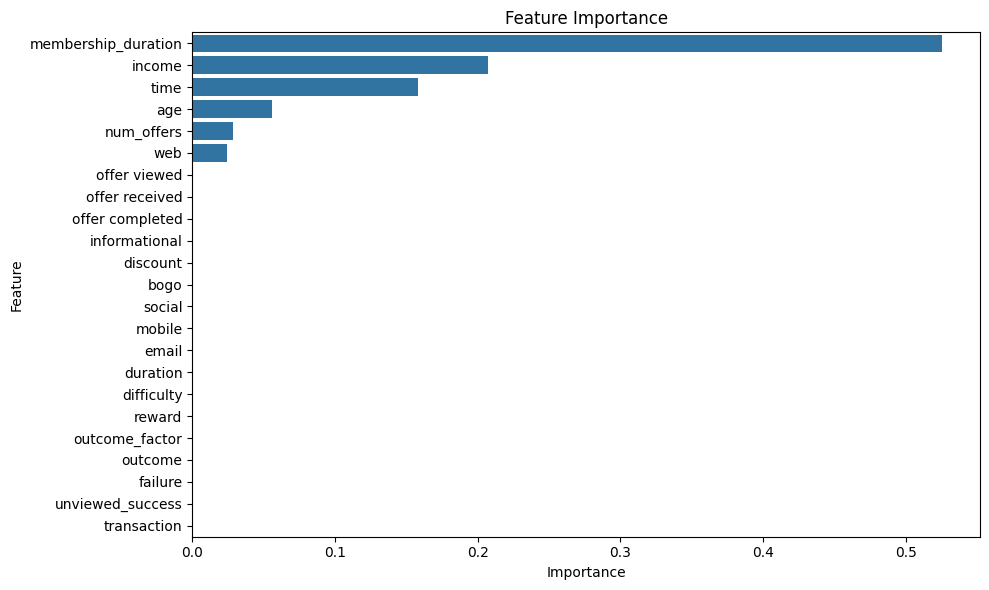

,Feature,Importance
0,membership_duration,0.525550
1,income,0.206921
2,time,0.158438
3,age,0.055755
4,num_offers,0.028672
5,web,0.024665
6,offer viewed,0.000000
7,offer received,0.000000
8,offer completed,0.000000
9,informational,0.000000


In [1161]:
identify_key_features(final_data, grid_model)

## Top Features Influencing Success:

#### Membership Duration (0.5255):

This feature has the highest importance, suggesting that how long a customer has been a member is the strongest predictor of success. Longer membership likely correlates with higher engagement and loyalty.
#### Income (0.2069):

Income also plays a significant role, with customers in different income brackets responding differently to offers. Higher-income individuals might be more inclined to complete offers, contributing to overall success.
#### Time (0.1584):

Time, possibly indicating how recent the offer or interaction occurred, has a moderate influence. Timing of the offers might affect whether the customer is likely to complete the offer or not.
#### Age (0.0558):

Age has a smaller, but still notable, effect. Different age groups may respond differently to the offers.
#### Number of Offers (0.0287):

The number of offers received by a customer slightly influences success. Perhaps more frequent offers increase engagement, but this could also lead to saturation, lowering effectiveness.
#### Web Interaction (0.0247):

The web interaction feature is minimally impactful. It indicates that customers who interact with offers through the web may complete offers slightly more than others.

### Zero-Impact Features:
The following features show 0 importance in the model, meaning they had no direct influence on predicting success:

Offer Viewed, Offer Received, Offer Completed: These are likely interactions or flags that the model didn't find predictive beyond other features like membership duration and income.
Channels (social, mobile, email): Surprisingly, these channels didn't show any measurable importance, suggesting that the medium through which offers are presented doesn’t significantly influence success.
Offer Type (bogo, discount, informational): Similarly, the type of offer doesn’t appear to play a crucial role in this particular model's predictions.
Outcome Variables (outcome, outcome_factor, failure, unviewed_success): These specific outcome-related variables didn't impact the model, likely because their effects were captured by other features such as time or membership duration.

## Result Summary:
The membership duration and income are the most influential features, suggesting that loyalty and financial ability are key drivers of success. Meanwhile, aspects like age and the number of offers also play a role, but to a lesser extent. Interestingly, the type of offer and interaction channels (social, mobile, email) didn’t contribute significantly, which could point to opportunities for better targeted marketing strategies in the future.